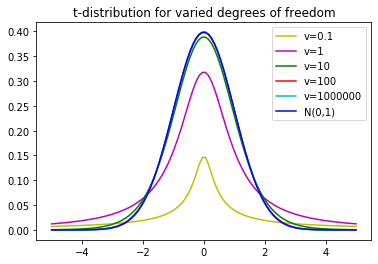

In [1]:
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import beta as b
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

mu=0
sigma=1

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

plt.plot(x, t.pdf(x, 0.1),'y-', x, t.pdf(x, 1),'m-',x, t.pdf(x, 10), 'g-', x, t.pdf(x, 100), 'r-', x, t.pdf(x, 10000),'c-', x, norm.pdf(x, mu, sigma),'b-')
plt.legend(["v=0.1", "v=1", "v=10", "v=100", "v=1000000", "N(0,1)" ])
plt.title("t-distribution for varied degrees of freedom")
plt.savefig("t-dist.png")

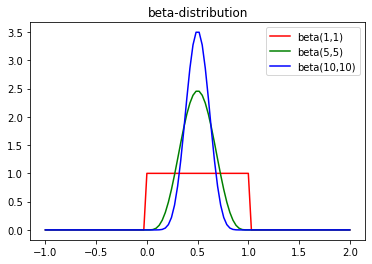

In [2]:
mu=0
sigma=1

x = np.linspace(mu - sigma, mu + 2*sigma, 100)

plt.plot(x, b.pdf(x, 1,1),'r-', x, b.pdf(x, 5,5),'g-',x, b.pdf(x, 10,10), 'b-')
plt.legend(["beta(1,1)", "beta(5,5)", "beta(10,10)" ])
plt.title("beta-distribution")
plt.savefig("beta-dist1.png")

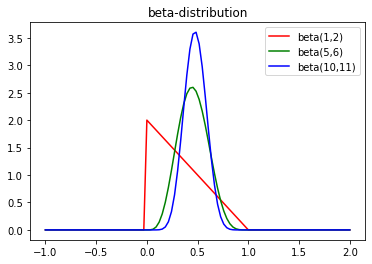

In [3]:
mu=0
sigma=1

x = np.linspace(mu - sigma, mu + 2*sigma, 100)

plt.plot(x, b.pdf(x, 1,2),'r-', x, b.pdf(x, 5,6),'g-',x, b.pdf(x, 10,11), 'b-')
plt.legend(["beta(1,2)", "beta(5,6)", "beta(10,11)" ])
plt.title("beta-distribution")
plt.savefig("beta-dist2.png")

In [4]:
from scipy.optimize import minimize

mu=0
sigma=np.sqrt(2)
num=30

x=np.random.normal(mu, sigma, num)

theta=np.array([0,1])

df=1

def gaussian_mle(theta):
    return -1*np.sum(np.log(norm.pdf(x, theta[0], theta[1])))   

def t_mle(df):
    return -1*np.sum(np.log(t.pdf(x, df)))   
    
res_g = minimize(gaussian_mle, theta, method = 'BFGS', options={'disp': True})
res_t = minimize(t_mle, df, method = 'BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 50.574899
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 52.108758
         Iterations: 11
         Function evaluations: 36
         Gradient evaluations: 12


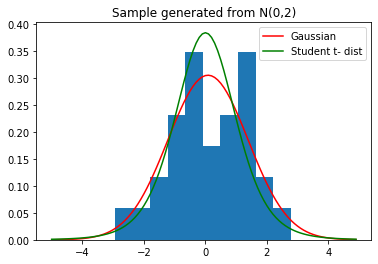

In [5]:
plt.hist(x, bins=10, density=True)
y=np.arange(-5.0,10,0.1)
y=np.arange(-5,5,0.1)
plt.plot(y, norm.pdf(y, res_g['x'][0], res_g['x'][1]),'r', y, t.pdf(y, res_t['x'][0]),'g')
plt.legend(["Gaussian","Student t- dist"])
plt.title("Sample generated from N(0,2)")
plt.savefig("sample1.png")

In [6]:
x=np.append(x,[8,9,10])

theta=np.array([0,1])

df=1
res_g = minimize(gaussian_mle, theta, method = 'BFGS', options={'disp': True})
res_t = minimize(t_mle, df, method = 'BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 81.500317
         Iterations: 13
         Function evaluations: 60
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 73.321258
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


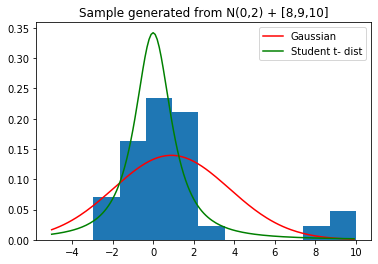

In [7]:
plt.hist(x, bins=10, density=True)
y=np.arange(-5.0,10,0.1)
plt.plot(y, norm.pdf(y, res_g['x'][0], res_g['x'][1]),'r', y, t.pdf(y, res_t['x'][0]),'g')
plt.legend(["Gaussian","Student t- dist"])
plt.title("Sample generated from N(0,2) + [8,9,10]")
plt.savefig("sample2.png")